In [1]:
# sklearn
from sklearn.cross_validation import  train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn import  ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import  PolynomialFeatures
from sklearn import  svm, model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



/opt/cloudera/parcels/Anaconda-4.3.1/envs/python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Read in file 
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

train_original.sample(10)
total  = [train_original, test_original]


In [12]:
train_original.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


####  从一列中抽取字符到另一列
- dataset['Salutation'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False) 
- dataset['Name'] # 对该列抽取

In [13]:
# retrive the salutation from Name column
for dataset in total :
    dataset['Salutation'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [14]:
pd.crosstab(train_original['Salutation'], train_original['Sex'])

Sex,female,male
Salutation,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### pd.crosstab(列1， 列2)
- 已列1为行索引，将列2按属性取值拆分， 构建新的df视图

In [15]:
pd.crosstab(test_original['Salutation'], test_original['Sex'])

Sex,female,male
Salutation,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


#### d

In [16]:
for dataset in total :
    dataset['Salutation'] = dataset['Salutation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Salutation'] = dataset['Salutation'].replace('Mlle', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Ms', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Mme', 'Mrs')
    dataset['Salutation'] = pd.factorize(dataset['Salutation'])[0]
    
# total.Sa

In [17]:
pd.crosstab(train_original['Salutation'], train_original['Sex'])

Sex,female,male
Salutation,,
0,0,517
1,126,0
2,185,0
3,0,40
4,3,20


In [19]:
# clean unused variable
train = train_original.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test = test_original.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)
total= [train, test]

train.shape, test.shape

((891, 9), (418, 8))

In [20]:
# Detect the missing data in 'train' dataset
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Salutation      0
dtype: int64

In [23]:
# create function to replace missing  data with median value
def fill_missing_age(dataset):
    for i in range(1, 4):
        median_age = dataset[dataset['Salutation'] == i]['Age'].median()
        dataset['Age'] = dataset['Age'].fillna(median_age)
        return dataset

train = fill_missing_age(train)

In [24]:
#  Embarked missing cases
train[train['Embarked'].isnull()] 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
61,1,1,female,38.0,0,0,80.0,NaN,2
829,1,1,female,62.0,0,0,80.0,NaN,1


In [29]:
train['Embarked'] = train['Embarked'].fillna('C')

In [30]:
test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Salutation     0
dtype: int64

In [31]:
test[test['Age'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
10,3,male,NaN,0,0,7.8958,S,0
22,1,female,NaN,0,0,31.6833,S,1
29,3,male,NaN,2,0,21.6792,C,0
33,3,female,NaN,1,2,23.4500,S,1
36,3,female,NaN,0,0,8.0500,S,2


In [32]:
# apply the missing age method to test dataset
test = fill_missing_age(test)

In [33]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
152,3,male,60.5,0,0,NaN,S,0


In [34]:
# filling the 'Fare' data with the median
def fill_missing_fare(dataset):
    median_fare = dataset[(dataset['Pclass'] == 3) & (dataset['Embarked'] == 'S')]['Fare'].median()
    dataset['Fare'] = dataset['Fare'].fillna(median_fare)
    return dataset

test = fill_missing_fare(test)

#### Re-Check for missing data

In [35]:
train.isnull().any()  # 查看train数据集中是否还有哪一列

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
Salutation    False
dtype: bool

In [38]:
for dataset in total :
    dataset.loc[dataset['Age'] <= 9, 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 9) & (dataset['Age'] <= 19), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 29), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 39), 'Age'] = 3
    dataset.loc[dataset['Age'] > 39, 'Age'] = 4

####  pd.qcut(df['列1'], n).value_counts()
- 对df[列1]按照分位数切分n块，并对切分结果按数值降序排序

In [39]:
pd.qcut(train['Fare'], 8).value_counts()


(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

In [40]:
for dataset in total :
    dataset.loc[dataset['Fare'] <= 7.75, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.75) & (dataset['Fare'] <=7.91), "Fare"] = 1 
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <=9.841), "Fare"] = 2 
    dataset.loc[(dataset['Fare'] > 9.841) & (dataset['Fare'] <=14.454), "Fare"] = 3 
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <=24.479), "Fare"] = 4 
    dataset.loc[(dataset['Fare'] > 24.479) & (dataset['Fare'] <=31), "Fare"] = 5 
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <=69.487), "Fare"] = 6 
    dataset.loc[dataset['Fare'] > 69.487, 'Fare'] = 7

In [41]:
for dataset in total:
    dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
    dataset['Embarked'] = pd.factorize(dataset['Embarked'])[0]

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,0,3,0,2.0,1,0,0.0,0,0
1,1,1,1,3.0,1,0,7.0,1,1
2,1,3,1,2.0,0,0,2.0,0,2
3,1,1,1,3.0,1,0,6.0,0,1
4,0,3,0,3.0,0,0,2.0,0,0


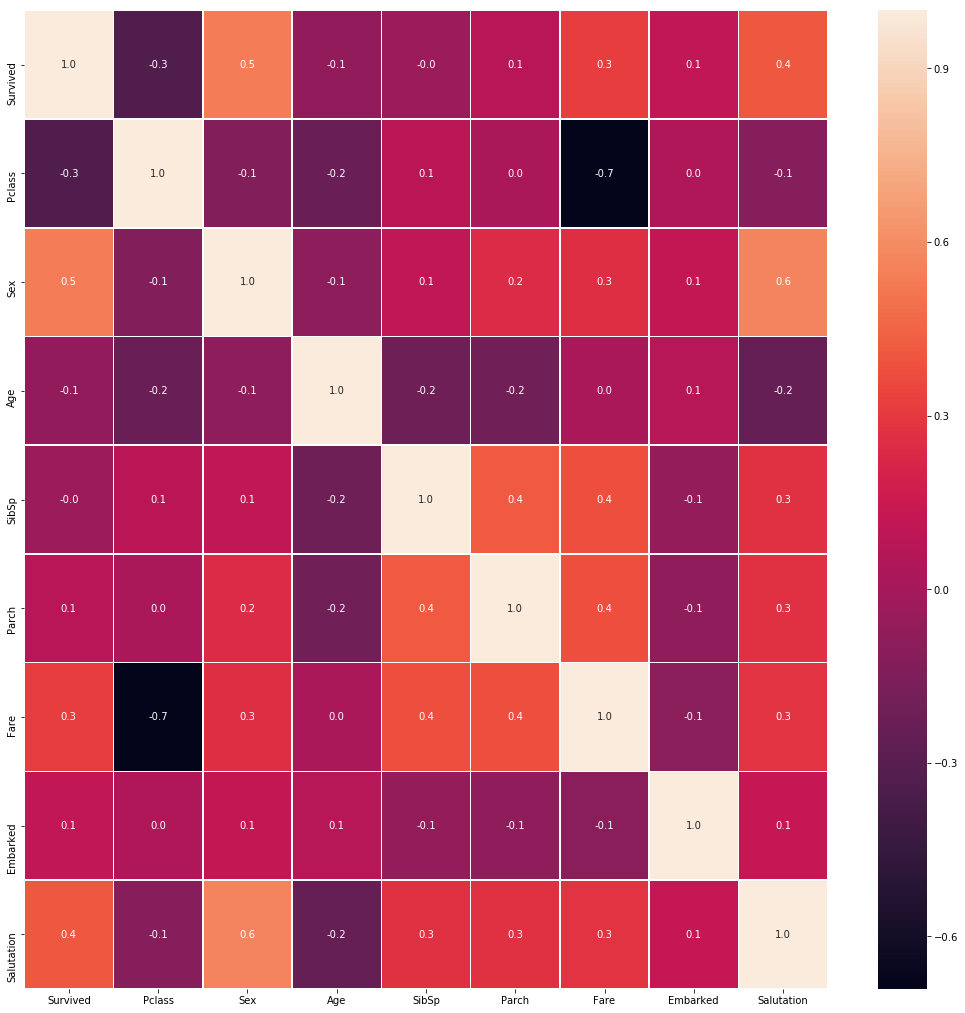

In [47]:
# correlation map
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

####  拆分X_train Y_train

In [49]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [50]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=.25, random_state = 1)

###  训练模型并对比结果

In [51]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(), 
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Process
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier() ,
    linear_model.RidgeClassifier(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True) ,
    svm.NuSVC(probability=True) ,
    svm.LinearSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),

]

In [52]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns= MLA_columns)

row_index = 0

for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test) 
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index += 1

MLA_compare.sort_values(by=['MLA Test Accuracy'], ascending=False , inplace=True)
MLA_compare
    

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,AdaBoostClassifier,0.8413,0.7982,0.812500,0.684211,0.783512
16,LinearSVC,0.7934,0.7937,0.802469,0.684211,0.779605
8,RidgeClassifier,0.7919,0.7892,0.785714,0.694737,0.777056
6,LogisticRegression,0.8114,0.7848,0.797468,0.663158,0.769079
12,GaussianNB,0.8099,0.7803,0.761364,0.705263,0.770600
2,ExtraTreesClassifier,0.9147,0.7758,0.800000,0.631579,0.757196
5,GaussianProcessClassifier,0.8922,0.7758,0.835821,0.589474,0.751768
3,GradientBoostingClassifier,0.8817,0.7713,0.814286,0.600000,0.749219
15,NuSVC,0.8428,0.7668,0.811594,0.589474,0.743956
14,SVC,0.8623,0.7668,0.830769,0.568421,0.741242


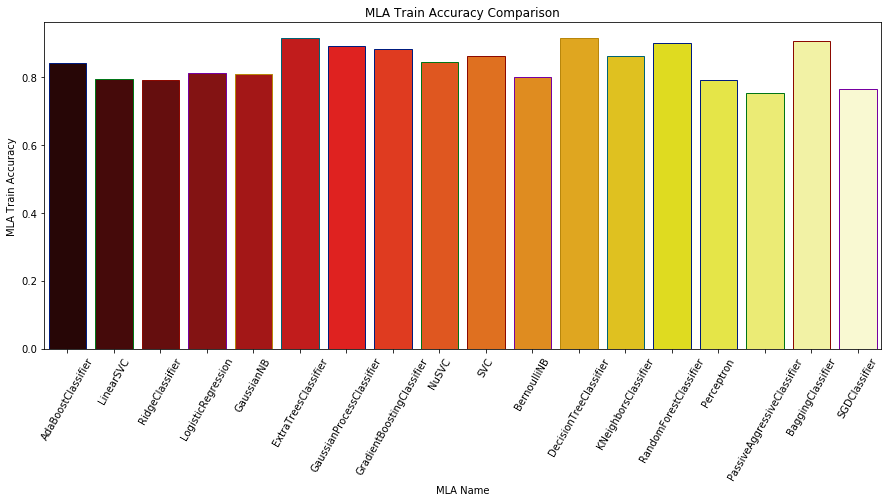

In [65]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('MLA Train Accuracy Comparison')
plt.show()

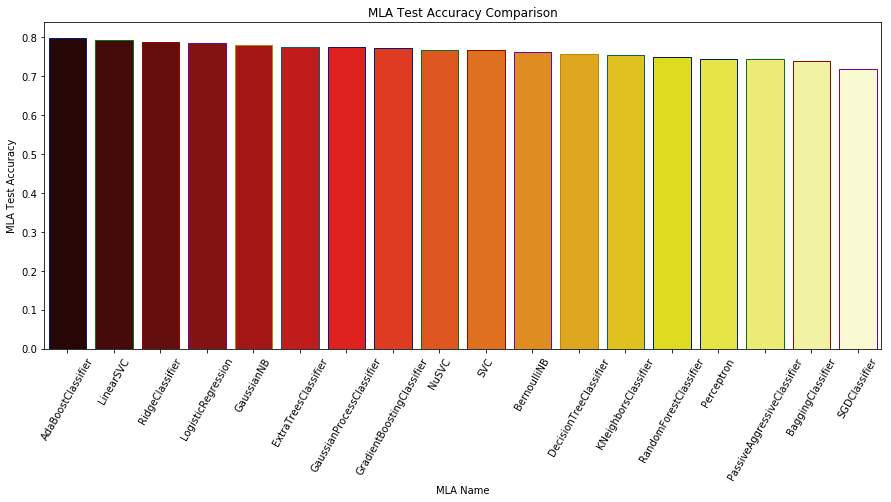

In [68]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('MLA Test Accuracy Comparison')
plt.show()

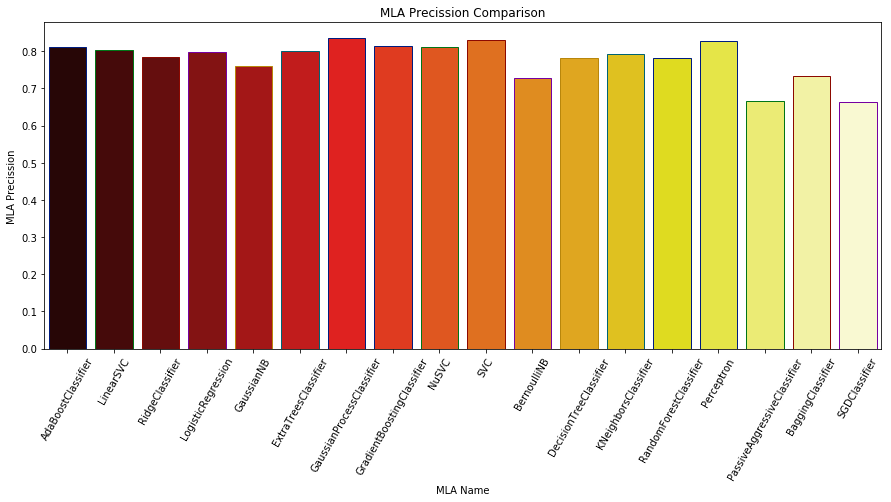

In [69]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('MLA Precission Comparison')
plt.show()

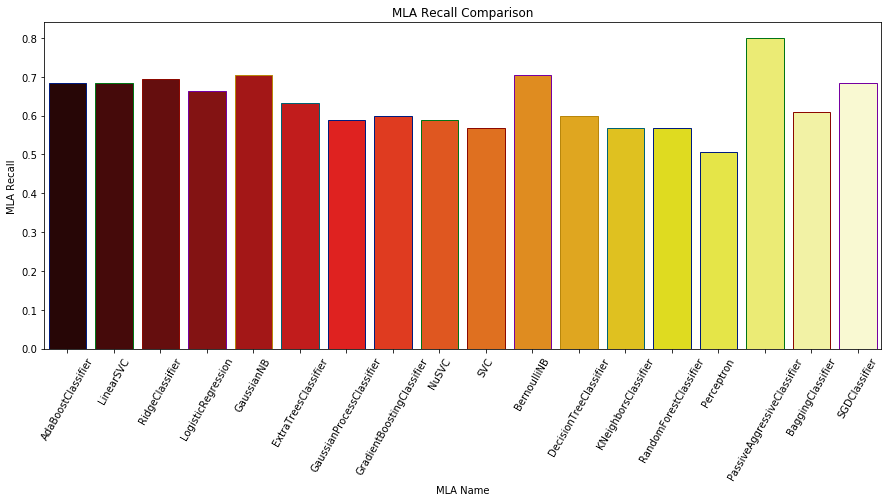

In [70]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('MLA Recall Comparison')
plt.show()

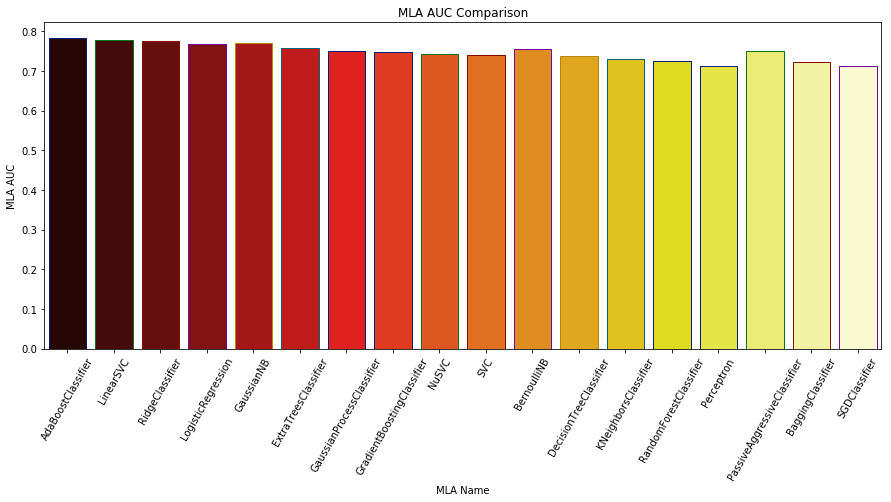

In [71]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('MLA AUC Comparison')
plt.show()

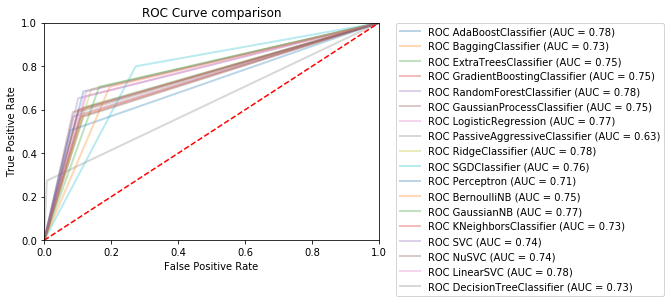

In [74]:
index = 1
for alg in MLA:
    
    predicted  = alg.fit(x_train, y_train).predict(x_test)
    fp , tp , th = roc_curve(y_test, predicted)
    roc_curve_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp , lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)' %(MLA_name, roc_curve_mla))
    
    index += 1
    
plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [75]:
tunealg = ensemble.ExtraTreesClassifier()
tunealg.fit(x_train, y_train)

print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
print('-'*10)

BEFORE tuning Parameters:  {'n_jobs': 1, 'max_leaf_nodes': None, 'class_weight': None, 'criterion': 'gini', 'warm_start': False, 'oob_score': False, 'bootstrap': False, 'min_impurity_split': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'verbose': 0, 'max_depth': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'n_estimators': 10, 'min_impurity_decrease': 0.0, 'random_state': None}
BEFORE tuning Training w/bin set score: 0.91
BEFORE tuning Test w/bin set score: 0.78
----------


In [76]:
#tune parameters
param_grid = {#'bootstrap': [True, False],
              'class_weight': ['balanced' , None],
              #'max_depth': [1, 2,3,4, None],
              #'max_features': ['log2', 'auto'],
              #'max_leaf_nodes': [0,1,2,3,4, None],
              #'min_impurity_decrease': [True, False, None],
              #'min_impurity_split': [True, False],
              #'min_samples_leaf': [1, 2,3,4,5],
              #'min_samples_split': [1,2,3,4,5],
              #'min_weight_fraction_leaf': [0.0,1.0,2.0,3.0,4.0,5.0], 
              #'n_estimators': [10,15,25,35,45], 
              'n_jobs':  [1,2,3,4,5], 
              #'oob_score': [True, False], 
              'random_state': [0,1, 2,3,4, None], 
              #'verbose': [0,1, 2,3,4, 5], 
              'warm_start': [True, False]
             }
# So, what this GridSearchCV function do is finding the best combination of parameters value that is set above.
tune_model = model_selection.GridSearchCV(linear_model.PassiveAggressiveClassifier(), param_grid=param_grid, scoring = 'roc_auc')
tune_model.fit (x_train, y_train)

print('AFTER tuning Parameters: ', tune_model.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("AFTER tuning Test w/bin set score: {:.2f}". format(tune_model.score(x_test, y_test)))
print('-'*10)

AFTER tuning Parameters:  {'n_jobs': 5, 'warm_start': True, 'random_state': None, 'class_weight': None}
AFTER tuning Training w/bin set score: 0.82
AFTER tuning Test w/bin set score: 0.77
----------
